In [67]:
import cv2
import numpy as np
import glob
'''
jpg list = baji / banbaji / banpal / blouse / bluejean / cardigan / coat / ginpal / jacket / mantoman / nambang
 / neat / onepiece / padding / skirt / training
'''
# 비교할 원본 이미지 입력
img = cv2.imread("../bunjang/test_ginpal2.jpg") # 원본

directory = 'D:/bunjang/data/backup/ginpal/'

In [68]:
# 평균 해시로 변환
def tohash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16,16))
    # 16*16 픽셀의 평균값을 계산
    avg = gray.mean()
    # 각 픽셀이 avg보다 크면 1, 작으면 0으로 전부 변환
    bins = 1 * (gray > avg)
    return bins

In [69]:
# 해밍 거리 측정
def hamming(a,b):
    # 2차원 한 줄로 변환
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    # 서로 일치하지 않는 부분의 합을 구함
    distance = (a != b).sum()
    return distance

In [70]:
test_img = tohash(img)

In [71]:
# 출력 결과 확인
test_img

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [72]:
from tqdm.notebook import tqdm

# 비교할 이미지 경로 설정
paths = glob.glob(directory + '*.jpg')

img_links = []
dst_num = []

print(len(paths))
print(paths[0])

4143
D:/bunjang/data/backup/ginpal\100217797_1.jpg


In [73]:
for path in tqdm(paths):
    # path에 있는 모든 이미지를 불러옴
    img = cv2.imread(path)
    cv2.waitKey(3)
    # 불러온 이미지들을 해쉬 함수에 넣음
    a_hash = tohash(img)
    # 원본 이미지와 paths 내 이미지들의 해쉬값들을 해밍거리로 비교
    dst = hamming(test_img, a_hash)
    # 사이즈가 곧 픽셀 수 이므로 거리 정규화를 위해 나눔(16*16=256)
    dt = dst/256
    # 정규화된 거리가 0.2 미만인 이미지만 출력
    if dt < 0.2:
        print(path, dt)
        img_links.append(path)
        dst_num.append(dt)
#         cv2.imshow(path, img)

In [74]:
print(len(img_links))

0


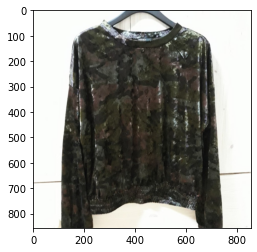

82.8125


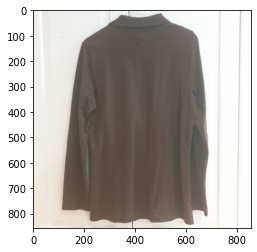

80.859375


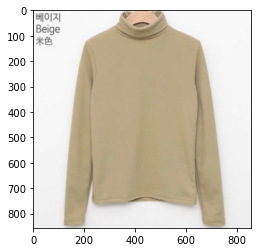

80.078125


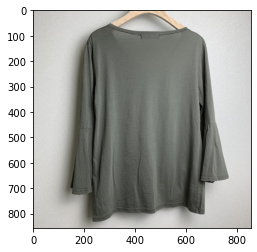

80.46875


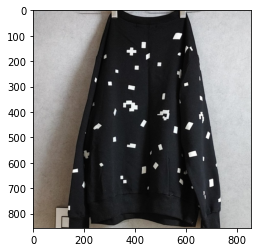

84.765625


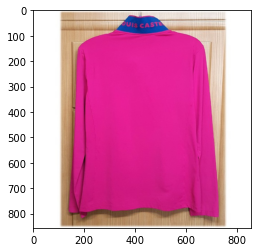

82.03125


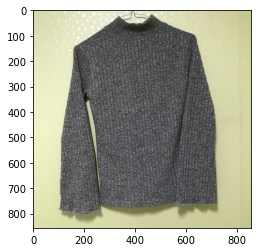

80.078125


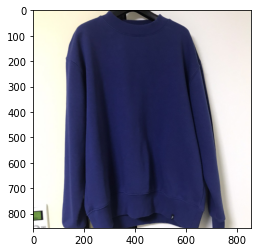

80.46875


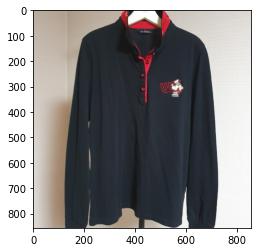

83.203125


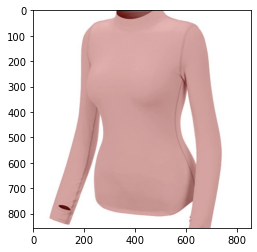

81.640625


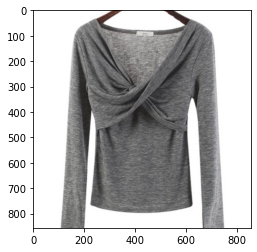

82.03125


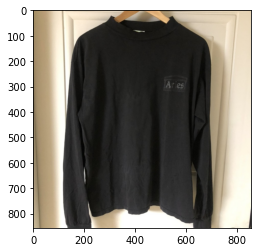

81.640625


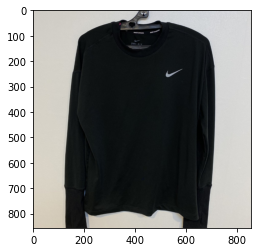

82.421875


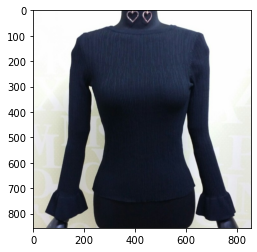

81.25


In [66]:
import matplotlib.image as img
import matplotlib.pyplot as pp
# 결과값 전부 출력
for i in range(len(img_links)):
    ndarray = img.imread(img_links[i])
    pp.imshow(ndarray)
    pp.show()
    print((1 - dst_num[i]) * 100)